In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#questions to answer
#1. Vehicles purchased based on the model year, recorded annually
#2. Most popular makes and models and why
#3. Count of electric vehicle type and why one is preferred over the other
#4. clean alternative fuel vehicle model and the frequency
#5. Most and least efficient in terms of electric range and whether their electric vehicle type
#6. City count of registered ev |rural or urban
#7. Electric utility station count

In [4]:
#importing pandas, matplotlib, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#loading the ekectric vehicles data sourced from kaggle
electric_vehicle_data = pd.read_csv("C:\\Users\\Administrator\\Downloads\\Electric_Vehicle_Data.csv")
electric_vehicle_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


In [6]:
#inspecting the data and checking for null values
electric_vehicle_data.info()
electric_vehicle_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181458 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181458 non-null  object 
 1   County                                             181455 non-null  object 
 2   City                                               181455 non-null  object 
 3   State                                              181458 non-null  object 
 4   Postal Code                                        181455 non-null  float64
 5   Model Year                                         181458 non-null  int64  
 6   Make                                               181458 non-null  object 
 7   Model                                              181458 non-null  object 
 8   Electric Vehicle Type                              181458 non-null  object

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [7]:
#dropping null values
electric_vehicle_data = electric_vehicle_data.dropna()


In [8]:
#inspecting to make sure null values are dropped
electric_vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181055 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181055 non-null  object 
 1   County                                             181055 non-null  object 
 2   City                                               181055 non-null  object 
 3   State                                              181055 non-null  object 
 4   Postal Code                                        181055 non-null  float64
 5   Model Year                                         181055 non-null  int64  
 6   Make                                               181055 non-null  object 
 7   Model                                              181055 non-null  object 
 8   Electric Vehicle Type                              181055 non-null  object 
 9 

In [9]:
#electric vehicles count by model year
ev_by_model_year=electric_vehicle_data['Model Year'].value_counts().sort_index()
ev_by_model_year

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      770
2012     1599
2013     4366
2014     3489
2015     4802
2016     5509
2017     8562
2018    14255
2019    10895
2020    11820
2021    18966
2022    27854
2023    58321
2024     9787
Name: count, dtype: int64

<Axes: title={'center': 'Number of Electric Vehicles Registered by Model Year'}, xlabel='EV Model by Year', ylabel='Frequency'>

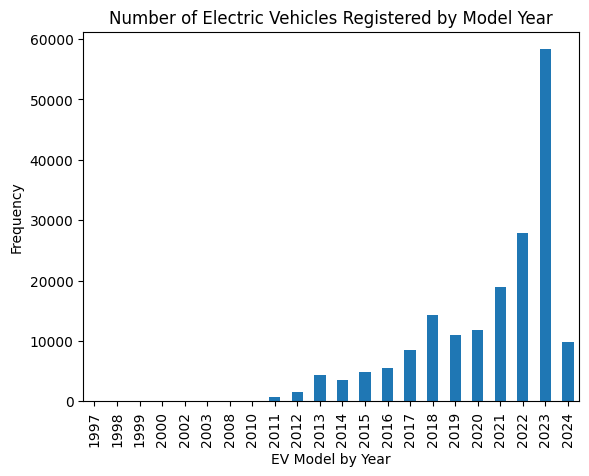

In [10]:
#plotting a bar chart to visualize electic vehicle model by year purchased
ev_by_model_year.plot(
    kind='bar',
    xlabel='EV Model by Year',
    ylabel='Frequency',
    title='Number of Electric Vehicles Registered by Model Year'
)
#trend has been increasing through out the years with a steep steady increase from 2021 to 2023.For the year 2024, the data covered only a few months hence the 2024 bar

In [11]:
#Electric Vehicles count by city
ev_by_city=electric_vehicle_data['City'].value_counts().sort_values(ascending=False)
ev_by_city

City
Seattle      30045
Bellevue      9116
Redmond       6568
Vancouver     6329
Bothell       5961
             ...  
Lebam            1
Startup          1
Glenwood         1
Adna             1
Maryhill         1
Name: count, Length: 468, dtype: int64

In [12]:
#Count of the various makes in descending order
makes_models_count=electric_vehicle_data.groupby('Make')['Make'].value_counts().sort_values(ascending=False)
makes_models_count.info()
makes_models_count

<class 'pandas.core.series.Series'>
Index: 40 entries, TESLA to ROLLS ROYCE
Series name: count
Non-Null Count  Dtype
--------------  -----
40 non-null     int64
dtypes: int64(1)
memory usage: 640.0+ bytes


Make
TESLA                   80627
NISSAN                  14024
CHEVROLET               13838
FORD                     9503
BMW                      7666
KIA                      7632
TOYOTA                   6485
VOLKSWAGEN               5153
JEEP                     4678
HYUNDAI                  4552
RIVIAN                   4419
VOLVO                    4278
AUDI                     3729
CHRYSLER                 3039
MERCEDES-BENZ            1646
PORSCHE                  1157
MITSUBISHI                979
MINI                      925
POLESTAR                  894
SUBARU                    837
HONDA                     834
FIAT                      783
DODGE                     607
MAZDA                     506
CADILLAC                  432
LEXUS                     398
LINCOLN                   269
SMART                     269
LUCID                     238
JAGUAR                    236
GENESIS                   189
FISKER                    111
LAND ROVER                 57
ALFA 

In [13]:
#Top 10 Makes
#method1
top_10_makes=makes_models_count.nlargest(10)
top_10_makes

Make
TESLA         80627
NISSAN        14024
CHEVROLET     13838
FORD           9503
BMW            7666
KIA            7632
TOYOTA         6485
VOLKSWAGEN     5153
JEEP           4678
HYUNDAI        4552
Name: count, dtype: int64

In [14]:
#method2
top_10_EV_makes=electric_vehicle_data.groupby('Make').size().nlargest(10).reset_index(name='Count')
top_10_EV_makes

,Make,Count
0,TESLA,80627
1,NISSAN,14024
2,CHEVROLET,13838
3,FORD,9503
4,BMW,7666
5,KIA,7632
6,TOYOTA,6485
7,VOLKSWAGEN,5153
8,JEEP,4678
9,HYUNDAI,4552


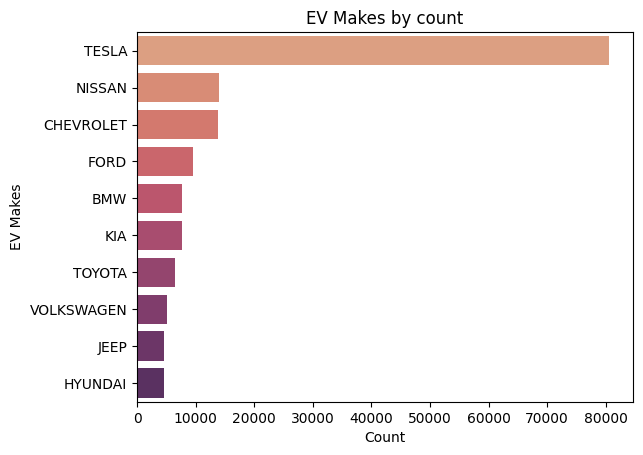

In [15]:
import matplotlib.pyplot as plt
#Bar graph plotted using pandas showing the top 10 makes by count
sns.barplot(x='Count', y='Make', data=top_10_EV_makes, hue='Make', palette='flare')
plt.xlabel('Count')
plt.ylabel('EV Makes')
plt.title('EV Makes by count')
plt.show()



In [16]:
#order of popularity of models of each of the top EVs by make
#1.Tesla
#Analysing the tesla models
tesla_models_analysis=electric_vehicle_data[electric_vehicle_data['Make'] == 'TESLA'].groupby(['Model','Electric Vehicle Type']).size().reset_index(name='Count')
tesla_models_analysis

,Model,Electric Vehicle Type,Count
0,CYBERTRUCK,Battery Electric Vehicle (BEV),1
1,MODEL 3,Battery Electric Vehicle (BEV),30065
2,MODEL S,Battery Electric Vehicle (BEV),7706
3,MODEL X,Battery Electric Vehicle (BEV),5871
4,MODEL Y,Battery Electric Vehicle (BEV),36937
5,ROADSTER,Battery Electric Vehicle (BEV),47


Text(0.5, 1.0, 'Tesla Models by Count')

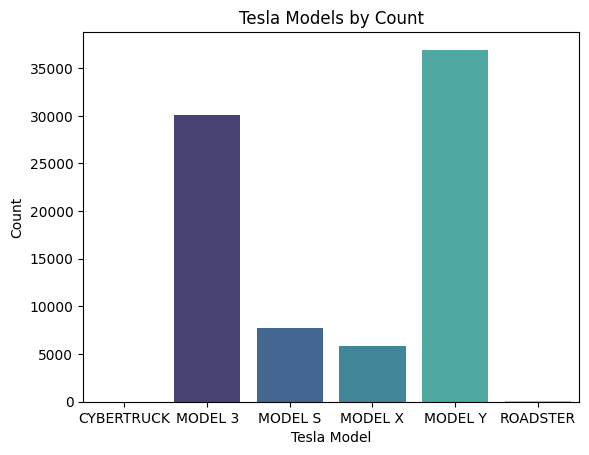

In [17]:
#bar chart showing tesla models by count
sns.barplot(x='Model', y='Count', data=tesla_models_analysis, hue='Model', palette='mako' )
plt.xlabel('Tesla Model')
plt.ylabel('Count')
plt.title('Tesla Models by Count')


In [18]:
#2. Nissan
nissan_makes_count=electric_vehicle_data[electric_vehicle_data['Make']=='NISSAN'].groupby('Model')['Model'].value_counts().sort_values(ascending=False)
nissan_makes_count

Model
LEAF     13343
ARIYA      681
Name: count, dtype: int64

<Axes: title={'center': 'Electric Nissan Models by Count'}, xlabel='Count', ylabel='Nissan Model'>

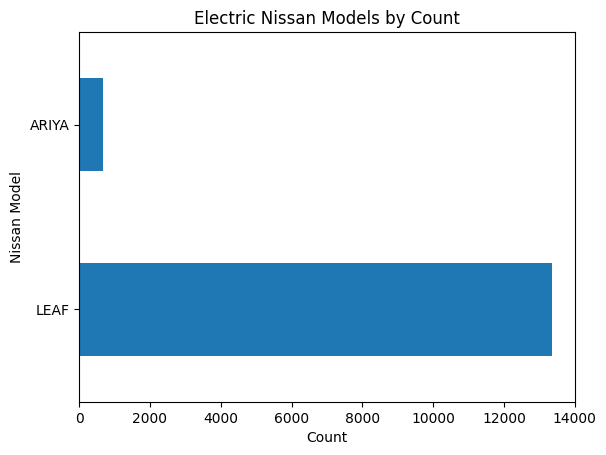

In [19]:
#bar chart showing nissan models by count
nissan_makes_count.plot(
    kind='barh',
    xlabel='Count',
    ylabel='Nissan Model',
    title='Electric Nissan Models by Count'
)

In [20]:
#3. Chevrolet
chevrolet_makes_count=electric_vehicle_data[electric_vehicle_data['Make']=='CHEVROLET'].groupby('Model').size().reset_index(name='Count')
chevrolet_makes_count

,Model,Count
0,BLAZER EV,16
1,BOLT EUV,1822
2,BOLT EV,6925
3,S-10 PICKUP,1
4,SILVERADO EV,45
5,SPARK,244
6,VOLT,4785


<function matplotlib.pyplot.show(close=None, block=None)>

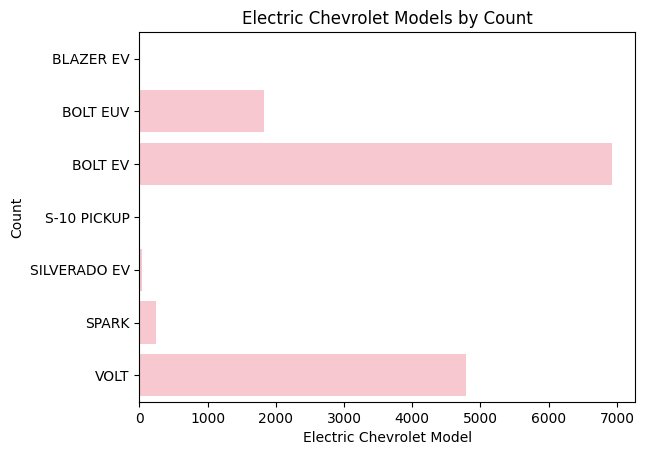

In [21]:
#bar chart showing chevrolet models by count
sns.barplot(y='Model', x='Count', data=chevrolet_makes_count, color='pink')
plt.xlabel('Electric Chevrolet Model')
plt.ylabel('Count')
plt.title('Electric Chevrolet Models by Count')
plt.show

In [65]:
top_10_models=electric_vehicle_data.groupby(['Make','Model','Electric Vehicle Type','Electric Range']).size().nlargest(10).reset_index(name='Count')
top_10_models
#It is clear that out of the top 10 models, 8 out of the 10 are Battery Electric Vehicle(BEV) while the remaining 2 are Plug-in Hybrid Electric Vehicle(PHEV) type. Only goes to show that the BEV has a wider market/ sells more.

,Make,Model,Electric Vehicle Type,Electric Range,Count
0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0,34570
1,TESLA,MODEL 3,Battery Electric Vehicle (BEV),0,16302
2,TESLA,MODEL 3,Battery Electric Vehicle (BEV),215,6119
3,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),0,4083
4,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220,4044
5,NISSAN,LEAF,Battery Electric Vehicle (BEV),84,3531
6,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),0,3481
7,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),238,3018
8,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),21,2964
9,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),25,2633


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

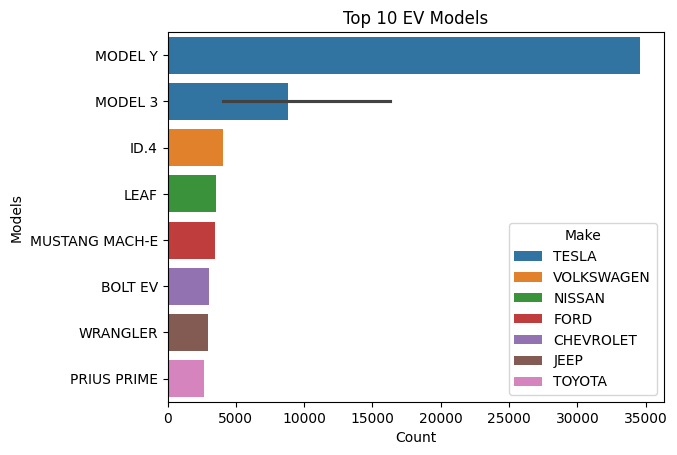

In [67]:
#Bar Chart showing top EV Models of all time from the dataframe
sns.barplot(x='Count', y='Model', hue='Make', data=top_10_models)
plt.xlabel('Count')
plt.ylabel('Models')
plt.title('Top 10 EV Models')
plt.show()

In [25]:
#df of the count of the type of electric vehicle
electric_vehicle_type=electric_vehicle_data.groupby(['Electric Vehicle Type']).size().reset_index(name='Count')
electric_vehicle_type
#Overall, BEV type has about 3X more sales than PHEV type

,Electric Vehicle Type,Count
0,Battery Electric Vehicle (BEV),141705
1,Plug-in Hybrid Electric Vehicle (PHEV),39350


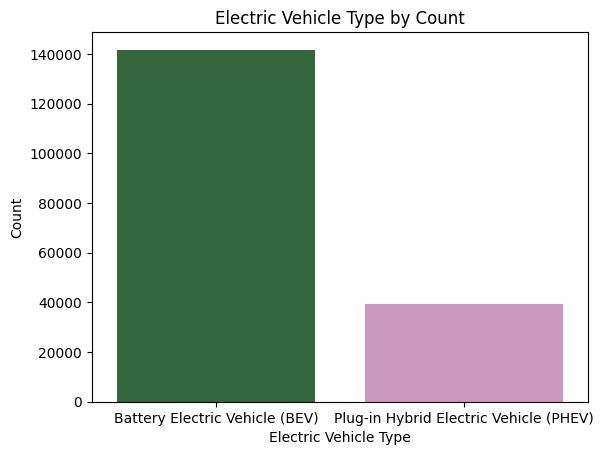

In [26]:
# barchart count of the type of electric vehicle
sns.barplot(x='Electric Vehicle Type', y='Count', data=electric_vehicle_type, hue='Electric Vehicle Type', palette='cubehelix')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.title('Electric Vehicle Type by Count')
plt.show()

In [62]:
#df of the count of the type of top 10 electric vehicle by make
top_ev_type_by_make=electric_vehicle_data.groupby(['Make','Electric Vehicle Type']).size().nlargest(10).reset_index(name='Count')
top_ev_type_by_make

,Make,Electric Vehicle Type,Count
0,TESLA,Battery Electric Vehicle (BEV),80627
1,NISSAN,Battery Electric Vehicle (BEV),14024
2,CHEVROLET,Battery Electric Vehicle (BEV),9053
3,TOYOTA,Plug-in Hybrid Electric Vehicle (PHEV),6117
4,FORD,Battery Electric Vehicle (BEV),5835
5,KIA,Battery Electric Vehicle (BEV),5194
6,VOLKSWAGEN,Battery Electric Vehicle (BEV),5153
7,BMW,Plug-in Hybrid Electric Vehicle (PHEV),5057
8,CHEVROLET,Plug-in Hybrid Electric Vehicle (PHEV),4785
9,JEEP,Plug-in Hybrid Electric Vehicle (PHEV),4678


Text(0.5, 1.0, 'Top 10 Electric Vehicle Type Count by Make')

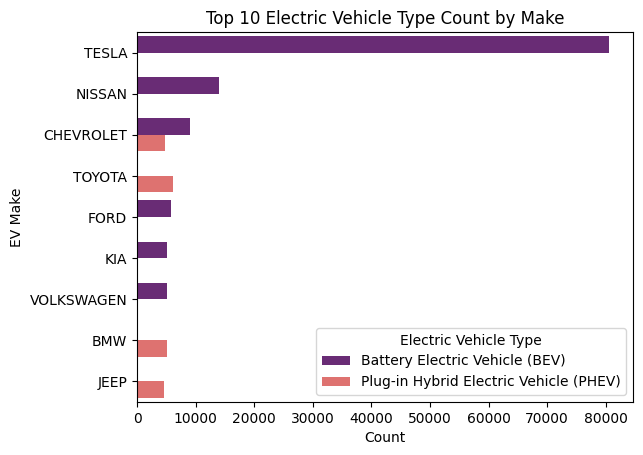

In [63]:
#bar chart of count of the top 10 types of electric vehicle by make
sns.barplot(
    x='Count',
    y='Make',
    data=top_ev_type_by_make,
    hue='Electric Vehicle Type',
    palette='magma'
)
plt.xlabel('Count')
plt.ylabel('EV Make')
plt.title('Top 10 Electric Vehicle Type Count by Make')

In [29]:
#df of the count of the type of the bottom 10 electric vehicle by make
bottom_ev_type_by_model=electric_vehicle_data.groupby(['Make','Electric Vehicle Type']).size().nsmallest(10).reset_index(name='Count')
bottom_ev_type_by_model

,Make,Electric Vehicle Type,Count
0,ROLLS ROYCE,Battery Electric Vehicle (BEV),1
1,BENTLEY,Plug-in Hybrid Electric Vehicle (PHEV),3
2,GMC,Battery Electric Vehicle (BEV),3
3,WHEEGO ELECTRIC CARS,Plug-in Hybrid Electric Vehicle (PHEV),3
4,MAZDA,Battery Electric Vehicle (BEV),5
5,TH!NK,Battery Electric Vehicle (BEV),5
6,HONDA,Battery Electric Vehicle (BEV),7
7,AZURE DYNAMICS,Battery Electric Vehicle (BEV),8
8,FISKER,Plug-in Hybrid Electric Vehicle (PHEV),10
9,ALFA ROMEO,Plug-in Hybrid Electric Vehicle (PHEV),42


Text(0.5, 1.0, 'Bottom 20 Electric Vehicle Type Count by Make')

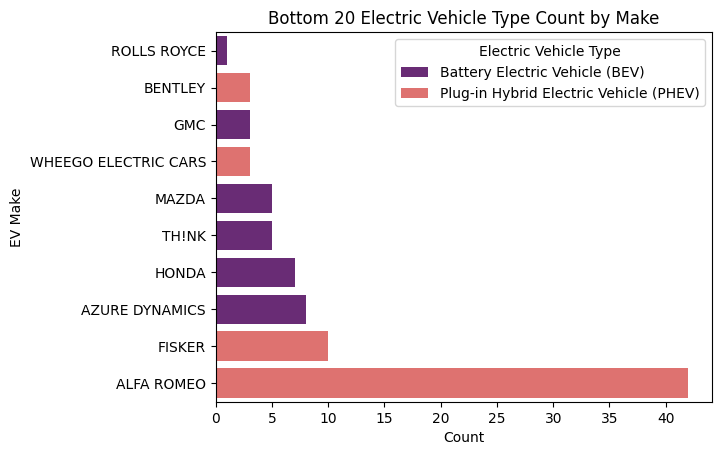

In [30]:
#bar chart of the count of the type of bottom 10 electric vehicle by make

sns.barplot(
    x='Count',
    y='Make',
    data=bottom_ev_type_by_model,
    hue='Electric Vehicle Type',
    palette='magma'
)
plt.xlabel('Count')
plt.ylabel('EV Make')
plt.title('Bottom 20 Electric Vehicle Type Count by Make')

In [31]:
#distribution of electric vehicles by County for the top 10 counties
ev_distribution_by_county=electric_vehicle_data.groupby('County').size().nlargest(10).reset_index(name='Count')
ev_distribution_by_county
#7 of these are urban counties, with 1 ie Whatcom  transitioning to urban and 2 ie Benton snd Skagit are rural

,County,Count
0,King,94460
1,Snohomish,21439
2,Pierce,14043
3,Clark,10667
4,Thurston,6600
5,Kitsap,5956
6,Spokane,4671
7,Whatcom,4331
8,Benton,2183
9,Skagit,1968


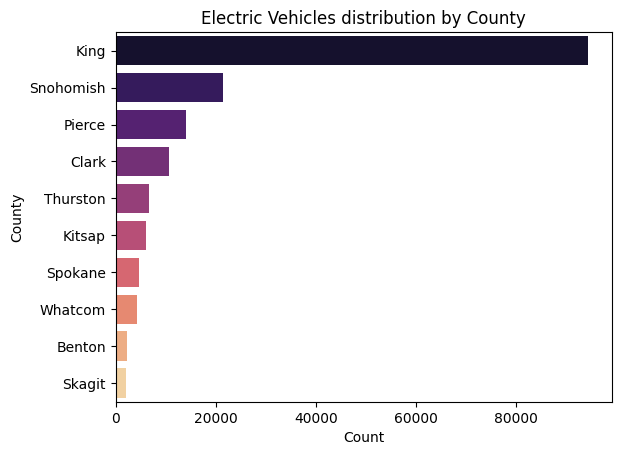

In [32]:
#bar chart of ev distribution by county for the top 10 counties
sns.barplot(
    x='Count',
    y='County',
    data=ev_distribution_by_county,
    hue='County',
    palette='magma'
)
plt.xlabel('Count')
plt.ylabel('County')
plt.title('Electric Vehicles distribution by County')
plt.show()

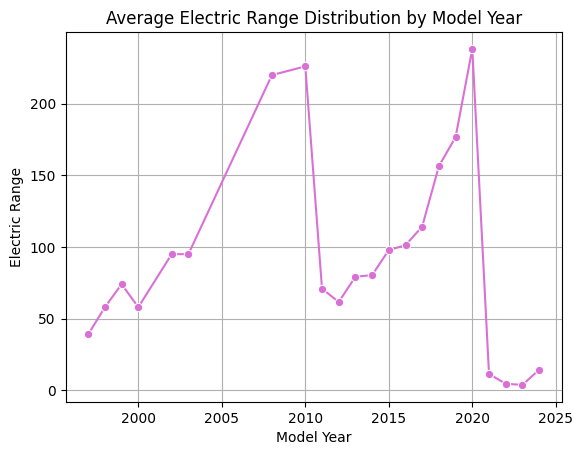

In [57]:
#average electric range by model year analysis
average_electric_range=electric_vehicle_data.groupby('Model Year')['Electric Range'].mean().reset_index()
average_electric_range
sns.lineplot(x='Model Year', y='Electric Range', data=average_electric_range, color='orchid', marker='o')
plt.title('Average Electric Range Distribution by Model Year')
plt.grid(True)
plt.show()
#There is a general upward trend with the peak in 2020 followed by a noticeable drop in the following years. The drop indicates either incomplete data or manufacture of low range vehicles

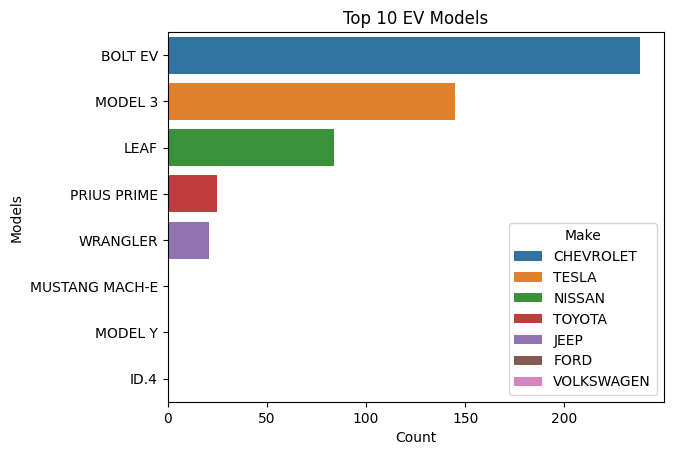

In [79]:
#analysis of the electric range of the top models of vehicles
top_models_by_electric_range = top_10_models.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
top_models_by_electric_range

sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_models_by_electric_range)
plt.xlabel('Count')
plt.ylabel('Models')
plt.title('Top 10 EV Models')
plt.show()


In [34]:
electric_vehicle_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
